In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
df = pd.read_csv("loan.csv")

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
df.shape

(592, 13)

In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,592.000000,592.000000,592.000000,578.000000,543.000000
mean,5404.304054,1642.633311,146.412162,342.145329,0.843462
std,6164.073003,2967.717486,85.587325,65.442101,0.363699
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2887.250000,0.000000,100.000000,360.000000,1.000000
50%,3806.000000,1221.000000,128.000000,360.000000,1.000000
75%,5754.500000,2312.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [20]:
df = df.dropna(subset=['ApplicantIncome', 'LoanAmount'])  


In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [32]:
X = df[["ApplicantIncome"]].values
Y = df[["LoanAmount"]].values

In [38]:
print(X[:5])
print(Y[:5])

[[4583]
 [3000]
 [2583]
 [6000]
 [5417]]
[[128.]
 [ 66.]
 [120.]
 [141.]
 [267.]]


In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [43]:
model = LinearRegression()
model.fit(x_train, y_train)

b1 = model.coef_[0]  
b0 = model.intercept_ 

print("Intercept =",b0)
print("Slope = ",b1)

Intercept = [103.70294803]
Slope =  [0.00823739]


In [45]:
y_pred_train = model.predict(x_train)

sse = np.sum((y_train - y_pred_train) ** 2)
print("Sum of Squared Errors",sse)

Sum of Squared Errors 2507795.6059480556


In [52]:
mse = np.sqrt(mean_squared_error(y_train,y_pred_train))


In [53]:
print("Root Mean Square Error=" , mse)

Root Mean Square Error= 72.81410205903775


In [54]:
r2 = r2_score(y_train, y_pred_train)


In [55]:
print("Score: ", r2)


Score:  0.3520609881995169


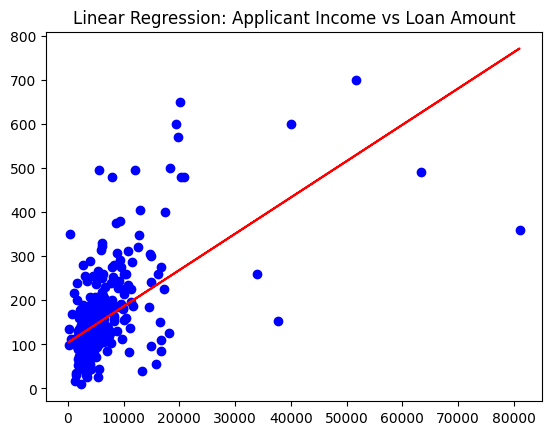

In [64]:
plt.scatter(x_train,y_train,color = "blue",label="Actual Data")
plt.plot(x_train,y_pred_train,color = "red",label="Regression Line")
plt.title("Linear Regression: Applicant Income vs Loan Amount")
plt.show()


In [66]:
new_income = np.array([[5000]])  # Example income
predicted_loan = model.predict(new_income)

print("Predicted Loan Amount for Applicant Income=" ,predicted_loan)


Predicted Loan Amount for Applicant Income= [[144.88987306]]
